In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Musical Analysis: Project 7

## Import Data 
Get all the csv data and combine it into a single dataset.

Column names:
- ID = unique id number
- title = song’s title
- artist = song’s artist
- top genre = the genre of the track
- year = song’s year in the billboard
- bpm = beats per minute (tempo)
- nrgy = energy, the higher the value the more energetic the song
- dnce = danceability, the higher the value the easier it is to dance to
- db = loudness, the higher the value the louder the song
- live = the higher the value the more likely the song is a live recording
- val = valence, the higher the value the more positive the mood
- dur = duration of the song
- acous = acousticness, the higher the value the more acoustic the song is
- spch = speechiness, the higher the value the more spoken word the song contains
- pop = popularity, the higher the value the more popular the song is

In [4]:
# Open and Read data from all CSVs
spot2010 = pd.read_csv('data/2010.csv', index_col=0)
spot2011 = pd.read_csv('data/2011.csv', index_col=0)
spot2012 = pd.read_csv('data/2012.csv', index_col=0)
spot2013 = pd.read_csv('data/2013.csv', index_col=0)
spot2014 = pd.read_csv('data/2014.csv', index_col=0)
spot2015 = pd.read_csv('data/2015.csv', index_col=0)
spot2016 = pd.read_csv('data/2016.csv', index_col=0)
spot2017 = pd.read_csv('data/2017.csv', index_col=0)
spot2018 = pd.read_csv('data/2018.csv', index_col=0)
spot2019 = pd.read_csv('data/2019.csv', index_col=0)

In [6]:
# Combine all into a single dataframe
years = [spot2010, spot2011, spot2012, spot2013, spot2014, spot2015, spot2016, spot2017, spot2018, spot2019]
all_top_songs = pd.concat(years)
all_top_songs.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [8]:
# Confirm all columns except 'title', 'artist', and 'top genre' are integers or floats
all_top_songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 603 entries, 1 to 603
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      603 non-null    object
 1   artist     603 non-null    object
 2   top genre  603 non-null    object
 3   year       603 non-null    int64 
 4   bpm        603 non-null    int64 
 5   nrgy       603 non-null    int64 
 6   dnce       603 non-null    int64 
 7   dB         603 non-null    int64 
 8   live       603 non-null    int64 
 9   val        603 non-null    int64 
 10  dur        603 non-null    int64 
 11  acous      603 non-null    int64 
 12  spch       603 non-null    int64 
 13  pop        603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 70.7+ KB


## Data Cleaning
Check for whitespaces, nonsensical, formatting, etc.

In [10]:
# Whitespace
all_top_songs['title'] = all_top_songs['title'].str.strip()
all_top_songs['artist'] = all_top_songs['artist'].str.strip()
all_top_songs['top genre'] = all_top_songs['top genre'].str.strip()

In [12]:
# Missing Data
all_top_songs[all_top_songs.isnull().any(axis=1)]

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop


## Data Analysis 
Use Pandas, Matplotlib, and/or Seaborn to answer the questions.

### Question 1
Most Popular Song in the Dataset?

'Memories' by Maroon 5

In [14]:
# What is the most popular song in the dataset? highest value in pop col
most_popular_song = all_top_songs.sort_values(by='pop', ascending=False).iloc[0]
most_popular_song['title'], most_popular_song['artist']

('Memories', 'Maroon 5')

### Question 2
Artist with the most songs?

Katy Perry

In [16]:
# What artist has the most songs in the dataset? group by artist and count
songs_by_artist = all_top_songs.groupby(by='artist', as_index=False)['title'].count()
songs_by_artist.sort_values('title', ascending=False).head()

,artist,title
86,Katy Perry,17
83,Justin Bieber,16
114,Maroon 5,15
145,Rihanna,15
94,Lady Gaga,14


### Question 3
Most popular genre in the dataset?

Dance Pop: First, I grouped by genre and did a count of the number of songs in each genre. Next, I grouped by genre and totaled the popularity score of each genre. In both instances, Dance Pop came out on top, with the most songs and highest combined popularity score.

In [72]:
# Most popular genre in the dataset? group by genre and count titles
songs_by_genre = all_top_songs.groupby(by='top genre', as_index=False)['title'].count()
songs_by_genre.sort_values('title', ascending=False).head()

,top genre,title
25,dance pop,327
48,pop,60
18,canadian pop,34
12,boy band,15
8,barbadian pop,15


In [74]:
# Most popular genre in the dataset? group by genre and sum pop
total_pop_by_genre = all_top_songs.groupby(by='top genre', as_index=False)['pop'].sum()
total_pop_by_genre.sort_values('pop', ascending=False).head()

,top genre,pop
25,dance pop,21047
48,pop,4490
18,canadian pop,2456
12,boy band,1045
33,electropop,1007


### Question 4
Songs in the dataset more than once?

Yes: there are 19 songs listed more than once in the dataset. This was determined by finding the sum of duplicated titles.

In [22]:
# Are there any songs in the dataset more than once? 
all_top_songs.duplicated(subset=['title']).sum()

np.int64(19)

In [24]:
# Store list of songs that appear more than once
repeat_titles = all_top_songs.loc[all_top_songs.duplicated(subset=['title'])]

### Question 5
Is there a relationship between popularity and danceability?

No: there isn't really a correlation between song popularity and danceability. There are plenty of songs that are highly popular, but not high on the danceability scale. Additionally, there are songs that have a higher danceability that are not popular. 

This is best shown with a scattplot, as shown below.

Text(0, 0.5, 'Popularity')

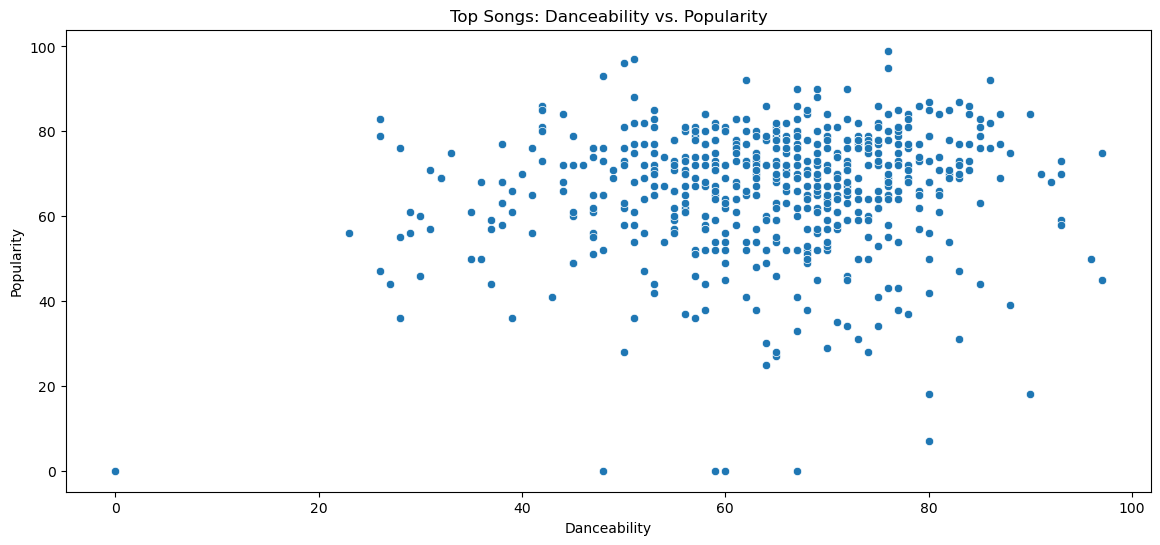

In [58]:
# Relationship between popularity and danceability
plt.figure(figsize=(14,6))
sns.scatterplot(data=all_top_songs, x='dnce', y='pop')
plt.title('Top Songs: Danceability vs. Popularity')
plt.xlabel('Danceability')
plt.ylabel('Popularity')

### Question 6
Does higher bpm lead to a higher energy score?

No: there isn't really a correlation between beats per minute (bpm) and energy. For songs between 100 and 200 bpm, their energy scores range anywhere from 20 to 95. Additionally, there are songs that have a higher danceability that are not popular. 

This is best shown with a scattplot, as shown below.

Text(0, 0.5, 'Energy Score')

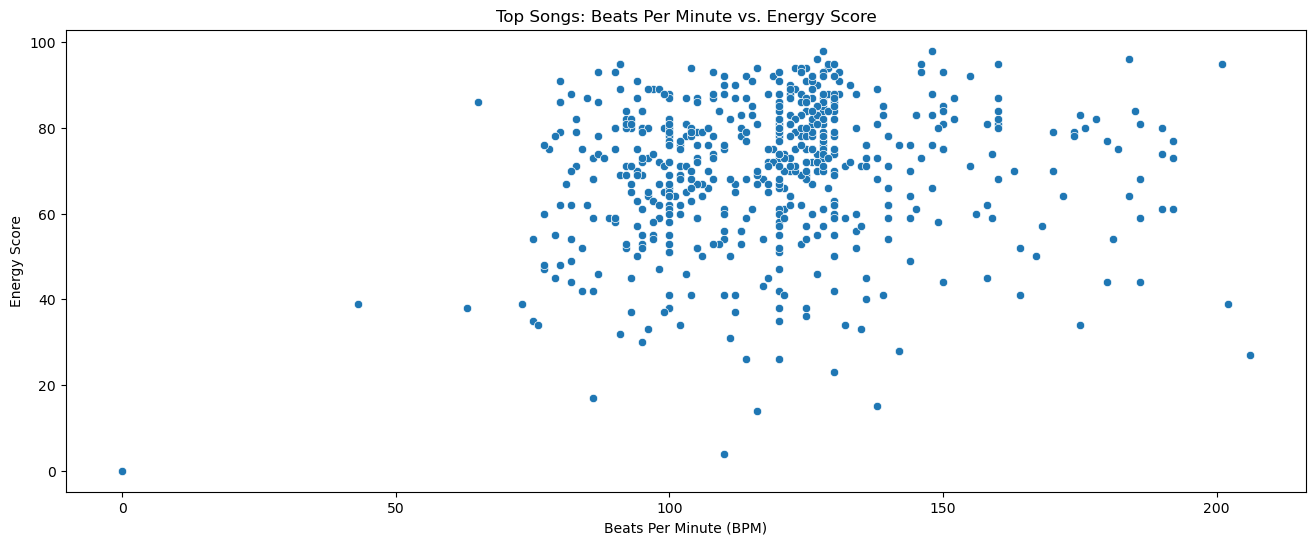

In [56]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=all_top_songs, x='bpm', y='nrgy')
plt.title('Top Songs: Beats Per Minute vs. Energy Score')
plt.xlabel('Beats Per Minute (BPM)')
plt.ylabel('Energy Score')

### Question 7
Genre with the highest energy score?

Boy Band and Big Room: When sorting all songs by energy score, descending, we see that the highest energy score is 98. There are two genres with an energy score of 98: boy band and big room.

In [60]:
all_top_songs.sort_values('nrgy', ascending=False).head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
199,Pom Poms,Jonas Brothers,boy band,2013,148,98,68,-2,28,90,198,7,9,52
51,Hello,Martin Solveig,big room,2010,128,98,67,-3,10,45,191,1,3,0
135,Don't Stop the Party (feat. TJR),Pitbull,dance pop,2012,127,96,72,-4,38,95,206,1,9,59
182,Rock N Roll,Avril Lavigne,canadian pop,2013,184,96,47,-3,34,67,207,1,13,61
201,How Ya Doin'? (feat. Missy Elliott),Little Mix,dance pop,2013,201,95,36,-3,37,51,211,9,48,50


## Extra Credit

In [222]:
# Export the combined data into a csv called 'top_spotify_songs.csv'
all_top_songs.to_csv('data/top_spotify_songs.csv')

### Question 1
What percentage of songs may have been recorded live?
_(consider anything above 50 in the live column to be recorded live)_

2.99%

To find the answer, I got the length of top_songs with live > 50 and divided that by the total number of songs.

In [202]:
# Find all songs with acoustic > 50 and count how many there are
# Then divide by total number of songs in the dataset
live_songs = len(all_top_songs[all_top_songs['live'] > 50])
total_songs = len(all_top_songs)
pct_live = live_songs/total_songs * 100
pct_live

2.9850746268656714

### Question 2
What percentage of songs were acoustic? _(consider anything above 50 in the acoustic column to be acoustic)_

7.30%

To find the answer, I got the length of top_songs with acoustic > 50 and divided that by the total number of songs.

In [210]:
acoustic_songs = len(all_top_songs[all_top_songs['acous'] > 50])
pct_acoustic = acoustic_songs/total_songs * 100
pct_acoustic

7.2968490878938645

### Question 3
Which year's songs have the highest amount of spoken word in the song?

2015

I found this by grouping all songs by year, then totaling the speech score for each year. I sorted by spch descending, which gave me the highest speechiness first.

In [217]:
# Group by year and sum spch for each
spch_by_year = all_top_songs.groupby(by='year', as_index=False)['spch'].sum()
spch_by_year.sort_values('spch', ascending=False).head()

,year,spch
5,2015,670
6,2016,669
7,2017,636
3,2013,590
8,2018,552
